# Black Scholes Model
## by Kashish Gupta (Masters in Quantitative Economics, UCLA)

### This notebook contains estimation of BSM for META stock
#### Data source: Yahoo Finance 

In [1]:
import pandas as pd
import statsmodels.api as sm
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from math import sqrt

In [2]:
import yfinance as yf
import getFamaFrenchFactors as gff

In [3]:
# pick the asset of interest, here I have chosen stock of Meta for a period of 10 years 

ticker = 'meta'                      # choose the stock of interest
start = dt.datetime(2013,1,31)       # start date 
end = dt.datetime.now()              # takes date today automatically, 04th Jan 2023

In [4]:
# download the relevant dataset from yahoo finance 

stock_data = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
# check for missing values 
stock_data.isnull().sum()

# there are no null values 

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'monthly closing price')

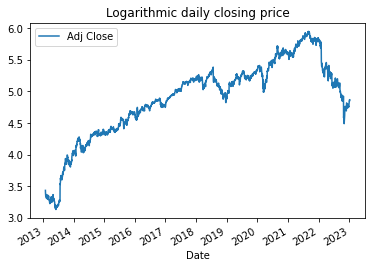

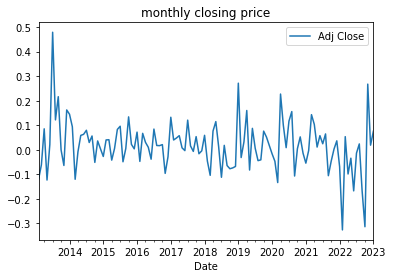

In [6]:
# create chart for daily and monthly closing price

plt.figure()
np.log(stock_data['Adj Close']).plot()               # 'Adj Close' is the closing price of the stock
plt.legend(loc='best')
plt.title('Logarithmic daily closing price',fontsize=12)

# calculate for monthly closing price 

mon = stock_data.resample('1M').last()             
mon_rets = mon.pct_change().dropna()

#plots of montly rets:
plt.figure()
(mon_rets['Adj Close']).plot()              
plt.legend(loc='best')
plt.title('monthly closing price',fontsize=12)

Text(0.5, 0.98, 'Plots of historical returns')

<Figure size 432x288 with 0 Axes>

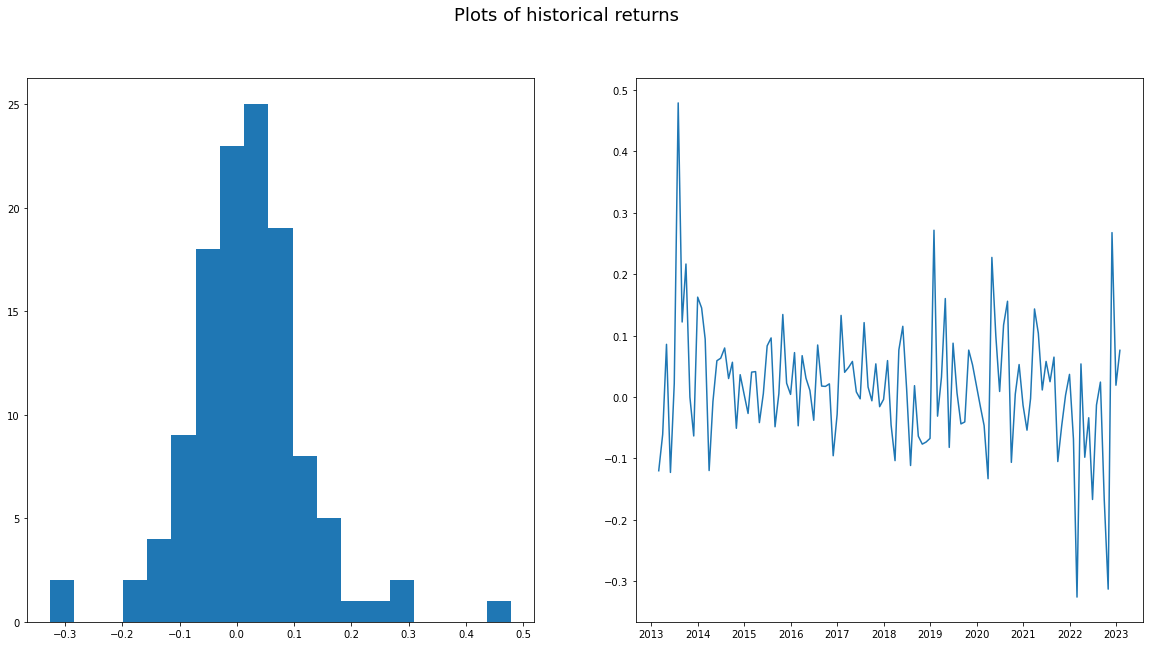

In [7]:
# visualize for daily asset returns 

#get daily returns:
stock_returns = stock_data['Adj Close'].resample('M').last().pct_change().dropna()

#lets get plots of the daily returns:
plt.figure()
fig1, axs = plt.subplots(1, 2,figsize=(20, 10))
axs[0].hist(stock_returns,bins= 'fd')
axs[1].plot(stock_returns)
fig1.suptitle('Plots of historical returns',fontsize=18)

In [8]:
stock_returns

Date
2013-02-28   -0.120400
2013-03-31   -0.061284
2013-04-30    0.085614
2013-05-31   -0.123154
2013-06-30    0.021766
                ...   
2022-09-30   -0.167250
2022-10-31   -0.313384
2022-11-30    0.267711
2022-12-31    0.018967
2023-01-31    0.075868
Freq: M, Name: Adj Close, Length: 120, dtype: float64

# Black Scholes Model

In [9]:
from math import log,e

In [10]:
# define a function with the following parameters: 
# stock_price: spot price of underlying assets 
# strike price
# interest: risk free interest rate 
# time: time to expiry 
# volatility
# dividend: we will assume no dividends 

def bsm(stock_price, strike_price, interest, time, volatility, dividend):


# defining parameters for the formula: 
    d1 = (log(stock_price/strike_price) + (interest - dividend + volatility**2/2) * time)/(volatility * time**.5)
    d2 = d1 - volatility * time**.5

# usin g the inbuilt scipy stats model to call out the cdf of the d1 and d2
    call = stats.norm.cdf(d1) * stock_price*e**(-dividend*time) - stats.norm.cdf(d2)*strike_price*e**(-interest*time)
    put = stats.norm.cdf(-d2)*strike_price*e**(-interest * time) - stats.norm.cdf(-d1) * stock_price*e**(-dividend*time)
    
    return[call ,put]

In [53]:
# stock_price will be the closing price of META stock 
# volatility: multiply the standard deviation of the stock returns over the past year by the square root of 252 (number of days the market is open over a year)

volatility = np.sqrt(252) * stock_returns.std()
volatility

1.632443228482681

In [54]:
# defining time variable

from datetime import datetime
expiry = '06-30-2023'   # assuming expiry date of 30th June 2023 
time = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365         # format from string to datetime 
time

0.4657534246575342

In [55]:
# defining other variables 
interest = 0.05  # assuming 5% risk free return 
strike_price = 200
dividend = 0 

In [14]:
# now let stock_price be closing price of the table-stock_data 

stock_price = stock_data['Adj Close']
stock_price

Date
2013-01-31     30.980000
2013-02-01     29.730000
2013-02-04     28.110001
2013-02-05     28.639999
2013-02-06     29.049999
                 ...    
2023-01-03    124.739998
2023-01-04    127.370003
2023-01-05    126.940002
2023-01-06    130.020004
2023-01-09    129.470001
Name: Adj Close, Length: 2503, dtype: float64

In [15]:
# getting different values of options for different stock prices 
for x in stock_price:
    print(bsm(x,strike_price, interest, time, volatility, dividend))

[1.582404064881361, 165.99868330312486]
[1.416700268978842, 167.08297950722232]
[1.2166814565900301, 168.50295962671828]
[1.280290297980203, 168.0365696888116]
[1.3307172265878702, 167.67699677000715]
[1.2815075854518612, 168.02778674740142]
[1.2693634340393354, 168.11564297745863]
[1.2345036044694946, 168.37078215606752]
[1.1308405401068236, 169.15711848135325]
[1.1931398142385423, 168.67941874730624]
[1.2633152143174682, 168.1595939947973]
[1.2416722764409185, 168.31795136209652]
[1.3158480432641162, 167.78212651856816]
[1.2584878484618707, 168.19476754446904]
[1.120636338452251, 169.23691443228657]
[1.1037427858057007, 169.3700224055189]
[1.1195056701358441, 169.245783992852]
[1.133114915339256, 169.13939430617066]
[1.0747972867459723, 169.6010752279924]
[1.1172462268381076, 169.26352500731792]
[1.1779735217819116, 168.79425161561622]
[1.17100951702839, 168.8472889841537]
[1.1479611086484014, 169.02423943136455]
[1.1399538445191681, 169.08623186205955]
[1.273000101158832, 168.089278

In [27]:
# add new columns to signify call option prices 

for x in stock_price:
    stock_data['call option'] = bsm(x,strike_price, interest, time, volatility, dividend)[0]

,Open,High,Low,Close,Adj Close,Volume,call option
Date,,,,,,,
2013-01-31,29.150000,31.469999,28.740000,30.980000,30.980000,190744900,39.76382
2013-02-01,31.010000,31.020000,29.629999,29.730000,29.730000,85856700,39.76382
2013-02-04,29.059999,29.200001,28.010000,28.110001,28.110001,92362200,39.76382
2013-02-05,28.260000,28.959999,28.040001,28.639999,28.639999,47948200,39.76382
2013-02-06,28.740000,29.290001,28.660000,29.049999,29.049999,38375900,39.76382
...,...,...,...,...,...,...,...
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.739998,35528500,39.76382
2023-01-04,127.379997,129.050003,125.849998,127.370003,127.370003,32397100,39.76382
2023-01-05,126.129997,128.520004,124.540001,126.940002,126.940002,25447100,39.76382


In [28]:
# add column for put option 

for x in stock_price:
    stock_data['put option'] = bsm(x,strike_price, interest, time, volatility, dividend)[1]

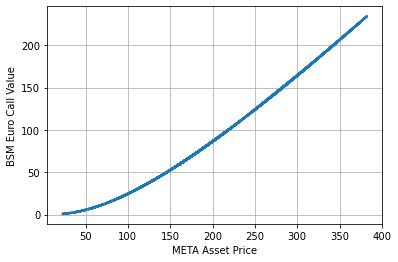

In [30]:
# Plotting the call option 

plt.plot(stock_price,[bsm(x,strike_price, interest, time, volatility, dividend)[0] for x in stock_price],lw=2.5)
plt.xlabel('META Asset Price')
plt.ylabel('BSM Euro Call Value')
plt.grid();

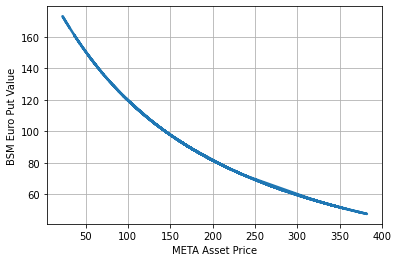

In [31]:
# Plotting the put option 

plt.plot(stock_price,[bsm(x,strike_price, interest, time, volatility, dividend)[1] for x in stock_price],lw=2.5)
plt.xlabel('META Asset Price')
plt.ylabel('BSM Euro Put Value')
plt.grid();

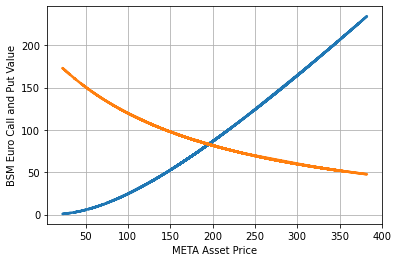

In [32]:
# plotting both call and put options together 

plt.plot(stock_price,[bsm(x,strike_price, interest, time, volatility, dividend)[0] for x in stock_price],lw=2.5)
plt.plot(stock_price,[bsm(y,strike_price, interest, time, volatility, dividend)[1] for y in stock_price],lw=2.5)
plt.xlabel('META Asset Price')
plt.ylabel('BSM Euro Call and Put Value')
plt.grid();

In [ ]:
# covered call strategy: we have meta stock
# when to sell and when to not: we would want underlying asset < strike price. RSI is a technical indicator, when RSI is above 70 then the probability of the stock going down is high 
# take 70-30 
# when RSI level is above 70 level then sell the call, if below 70 then dont sell the call 
# when RSI level is below 30 then buy back the call 
# 
# at what strike price: if meta is 1000 and if i sell at 1050 then likelihood of that option expiring in the money is probably. we need a strike price which is not too far nor too close. volume weighted average price (vwap)  

# Trading Strategies

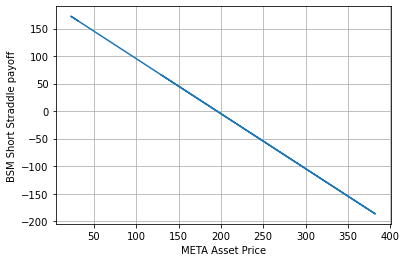

In [46]:
# short straddle 

def short_straddle(stock_price, strike_price, interest, time, volatility, dividend):
        call1 = bsm(stock_price,strike_price, interest, time, volatility, dividend)[0] 
        put1 =bsm(stock_price,strike_price, interest, time, volatility, dividend)[1]
        return put1 - call1

plt.plot(stock_price, [short_straddle(x,strike_price, interest, time, volatility, dividend) for x in stock_price])
plt.xlabel('META Asset Price')
plt.ylabel('BSM Short Straddle payoff')
plt.grid();

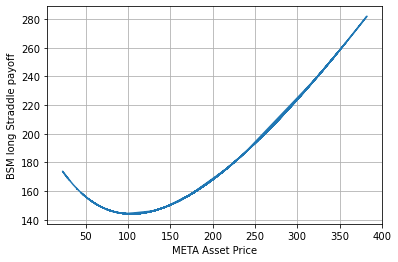

In [106]:
# long straddle 

def long_straddle(stock_price, strike_price, interest, time, volatility, dividend):
        call1 = bsm(stock_price,strike_price, interest, time, volatility, dividend)[0] 
        put1 =bsm(stock_price,strike_price, interest, time, volatility, dividend)[1]
        return put1 + call1
    
    
plt.plot(stock_price, [long_straddle(x,strike_price, interest, time, volatility, dividend) for x in stock_price])
plt.xlabel('META Asset Price')
plt.ylabel('BSM long Straddle payoff')
plt.grid();

In [29]:
stock_data.reset_index(inplace=True)

In [190]:
# locate closing price for a given date 

y = stock_data.loc[stock_data['Date'] == '2020-01-31']
y['Adj Close']

1762    201.910004
Name: Adj Close, dtype: float64

In [193]:
# lets assume that we enter the contract on 31st January 2020 
# we will find out the option premium for 2020-01-31

print(bsm(201.910004,strike_price, interest, time, volatility, dividend)[1])

81.12874740707551


In [210]:
# long put 
premium = 81.12874740707551

def put_profit(x, strike_price, interest, time, volatility, dividend,premium):
    if x<strike_price:
        return (strike_price - x - premium)

    if x > strike_price:
        return (0 - premium)

In [212]:
for x in stock_price:
    print(put_profit(x, strike_price, interest, time, volatility, dividend,premium))

87.89125305068816
89.14125305068816
90.76125198257293
90.23125320327605
89.82125335586394
90.22125297439422
90.32125335586394
90.61125236404266
91.5012517536911
90.96125274551238
90.37125259292449
90.55125289810027
89.94125228774871
90.41125350845184
91.59125190627898
91.74125343215789
91.60125213516082
91.48125320327605
92.0012517536911
91.62125259292449
91.09125190627898
91.15125327957
91.35125213516082
91.42125182998504
90.29125266921844
90.91125350845184
90.73125320327605
91.04125266921844
91.79125266921844
91.83125167739715
92.22125297439422
92.38125282180633
92.32125335586394
93.01125198257293
93.13125282180633
93.14125305068816
93.74125343215789
93.66125350845184
92.7812524403366
93.29125266921844
93.34125190627898
93.45125251663055
92.62125259292449
91.80125289810027
91.48125320327605
92.02125221145477
92.2812524403366
91.30125289810027
90.85125213516082
91.47125297439422
92.35125213516082
91.95125251663055
92.24125343215789
93.18125205886687
93.14125305068816
92.90125327957
92

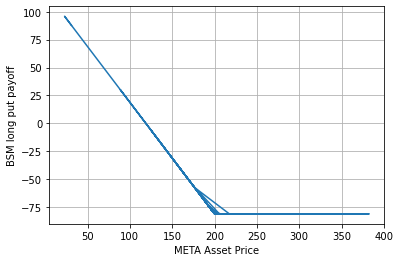

In [214]:
plt.plot(stock_price, [put_profit(x,strike_price, interest, time, volatility, dividend,premium) for x in stock_price])
plt.xlabel('META Asset Price')
plt.ylabel('BSM long put payoff')
plt.grid();

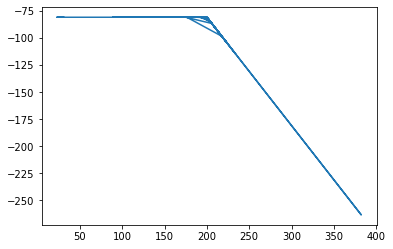

In [215]:
# short put 

premium = 81.12874740707551

def put_short_profit(x, strike_price, interest, time, volatility, dividend,premium):
    if x<strike_price:
        return (0 - premium)

    if x > strike_price:
        return (strike_price - x - premium)
    
plt.plot(stock_price, [put_short_profit(x,strike_price, interest, time, volatility, dividend,premium) for x in stock_price])


# covered call

In [31]:
# You forecast that the price will not rise a significant amount. 
# You want to collect additional income. 
# To do this you will create a simulation for a covered call strategy.

In [66]:
meta_price = yf.Ticker('meta').get_info()['previousClose']
meta_price

130.02

In [78]:
# lets take strike price as 135

call = bsm(stock_price=meta_price,strike_price = 135, interest = 0.05, time = 0.4657534246575342, volatility = 1.632443228482681,dividend = 0)[0]
call

put = bsm(stock_price=meta_price,strike_price = 135, interest = 0.05, time = 0.4657534246575342, volatility = 1.632443228482681,dividend = 0)[1]
net_premium = (call-put)



In [73]:
# lets define covered call 

cov_call = [(x+call)*100 if (x+call)*100 < (strike_price+call)*100 else (strike_price+call)*100 for x in stock_price]

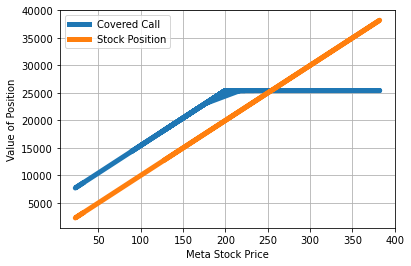

In [74]:
# plotting the covered call strategy 

plt.plot(stock_price,cov_call,label='Covered Call',lw=5)
plt.plot(stock_price,stock_price*100,label='Stock Position',lw=5)

plt.ylabel('Value of Position')
plt.xlabel('Meta Stock Price')
plt.grid()
plt.legend();

# collar option

In [76]:
# You forecast that the price will fall, 
# but you do not want to pay for a put option outright. 
# Instead you plan to sell a covered call to purchase a protective put, simulating a collar strategy.

In [79]:
sk_price_call = 140
sk_price_put = 120

collar_list = []

for x in stock_price:
  if x > sk_price_call:
    #price at which shares get called from selling call option
    collar_list.append((sk_price_call+net_premium)*100)
  elif x < sk_price_put:
    #price at which shares would be sold using the protective put
    collar_list.append((sk_price_put+net_premium)*100)
  else:
    collar_list.append((x+net_premium)*100)

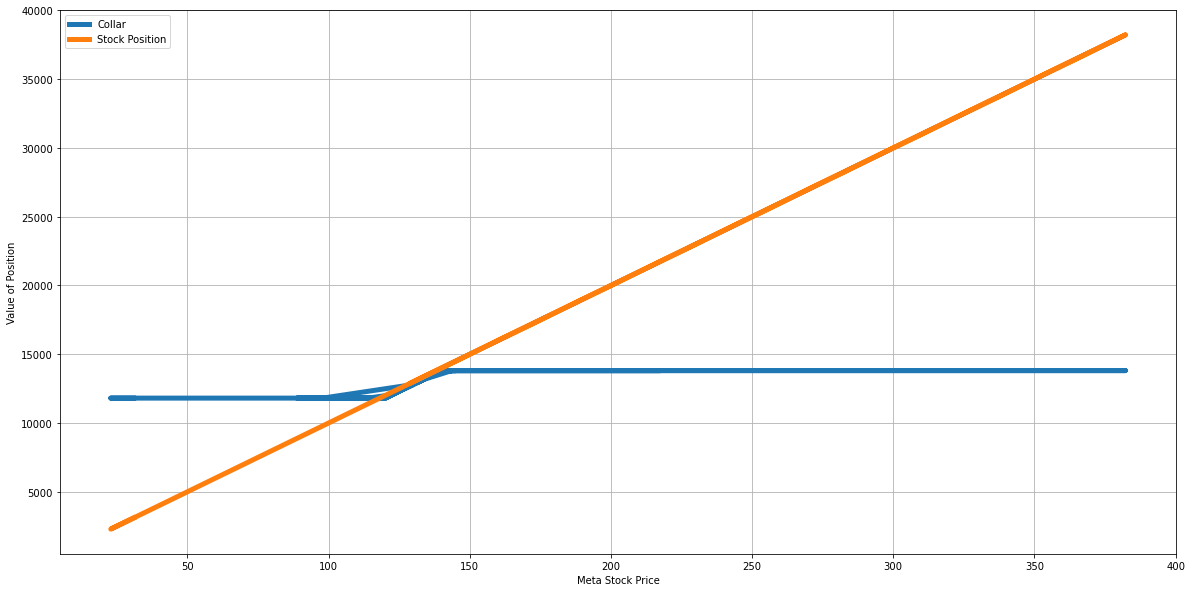

In [85]:
# plotting the collar strategy 

plt.figure(figsize=(20,10))
plt.plot(stock_price,collar_list,label='Collar',lw=5)
plt.plot(stock_price,stock_price*100,label='Stock Position',lw=5)
plt.ylabel('Value of Position')
plt.xlabel('Meta Stock Price')
plt.grid()
plt.legend();

In [86]:
# protective put

In [87]:
# You forecast that the price will fall significantly. 
# You want to protect your portfolio. 
# To do this you will create a simulation for a protective put strategy.

In [88]:
protect_put = [(x-put)*100 if (x-put)*100 > (strike_price-put)*100 else (strike_price-put)*100 for x in stock_price]

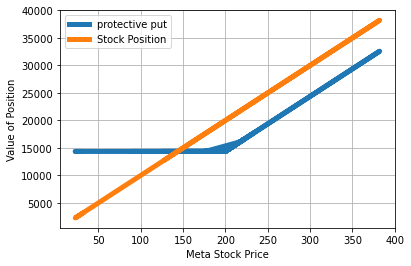

In [90]:
# plotting the protective put strategy 

plt.plot(stock_price,protect_put,label='protective put',lw=5)
plt.plot(stock_price,stock_price*100,label='Stock Position',lw=5)
plt.ylabel('Value of Position')
plt.xlabel('Meta Stock Price')
plt.grid()
plt.legend();